# فرید نعمتی علی ذوالجلالی 

ابتدا کتابخانه های لازم را ایمپورت میکنیم

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

حال عکس را لود کرده و نمایش میدهیم که چون رنگی است 3 کانال دارد

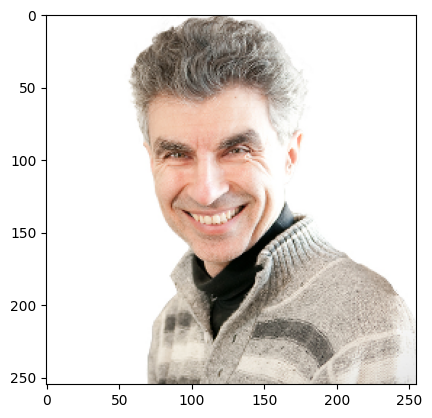

(255, 255, 3)


In [154]:
img = cv2.imread('images/bengio.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (255, 255))
plt.imshow(img_rgb)
plt.show()
print(img_rgb.shape)

# تعریف فیلتر های لایه اول و اعمال آن ها

سپس فیلتر های داده شده را تعریف کرده و آن ها را با کمک توابع نامپای به هم میچسبانیم

In [155]:
sharp = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]])

bottom_sobel =  np.array([
                   [-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
top_sobel = np.array([
                 [1, 2, 1],
                 [0, 0, 0],
                 [-1,-2,-1]])

sharpening = np.array([[0,-1,0],
                      [-1,5,-1],
                      [0,-1,0]])

weighted_averaging_3x3 = (1/16)* np.array([[1, 2, 1],
                                           [2, 4, 2],
                                           [1, 2, 1]])       

l1_filters = np.stack([sharp, bottom_sobel, top_sobel, weighted_averaging_3x3], axis=-1)

print(l1_filters.shape)

(3, 3, 4)


برای نوشتن کانوولوشن 2 بعدی بر روی عکس از کد های کلاس حل تمرین استفاده شده همچنین در آن استراید هم لحاظ میکنیم و فیلتر هارا بر روی عکس حرکت میدهیم و حاصل را جمع میکنیم  

In [158]:
def Conv2D(img, filters, stride=1, padding='same'):
    
    img_height, img_width, num_channels = img.shape
    
    filter_height, filter_width, num_filters = filters.shape
#    print(num_filters,filter_height,filter_width)
    if padding == 'same':
        out_height = int(np.ceil(float(img_height) / float(stride)))
        out_width = int(np.ceil(float(img_width) / float(stride)))
    else:
        out_height = int(np.ceil(float(img_height - filter_height + 1) / float(stride)))
        out_width = int(np.ceil(float(img_width - filter_width + 1) / float(stride)))
        
    output = np.zeros((out_height, out_width, num_filters))
    
    if padding == 'same':
        pad_h = ((out_height - 1) * stride + filter_height - img_height) // 2
        pad_w = ((out_width - 1) * stride + filter_width - img_width) // 2
        img_padded = np.pad(img, [(pad_h, pad_h), (pad_w, pad_w), (0, 0)], mode='constant')
    else:
        img_padded = img
        
    for i in range(num_filters):
        for h in range(out_height):
            for w in range(out_width):
                vert_start = h * stride
                vert_end = vert_start + filter_height
                horiz_start = w * stride
                horiz_end = horiz_start + filter_width
                
                img_slice = img_padded[vert_start:vert_end, horiz_start:horiz_end, :]
                output[h, w, i] = np.sum(img_slice * filters[:, :, i, np.newaxis])   
                
    return output

In [159]:
layer_one_output = Conv2D(img_rgb, l1_filters, stride=1, padding='same')
print(layer_one_output.shape)

(255, 255, 4)


حال که نتیجه را بدست اوردیم ان را با شکل اصلی نمایش میدهیم

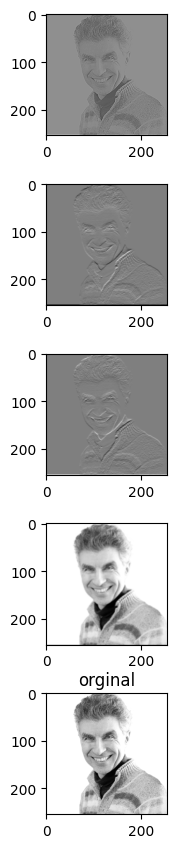

In [160]:
from matplotlib import colors
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(50, 10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
#plot 1:

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.title("orginal")
ax[4].imshow(img_gray, cmap='gray')

for i in range(0,4):
    norm_result = ((layer_one_output[:,:,i] - layer_one_output[:,:,i].min()) / (layer_one_output[:,:,i].max() - layer_one_output[:,:,i].min())) * 255
    ax[i].imshow(norm_result.astype(np.uint8), cmap='gray')

plt.show()


# تعریف فیلتر های لایه دوم و اعمال آن ها

در اینجا فیلتر های لایه دوم را تعریف کرده و آن هارا به هم میچسبانیم

In [161]:
robert_x = np.array([[1, 0],
                    [0, -1]])   

robert_y = np.array([[0, +1],
                    [-1, 0]] )

averaging_2x2 = (1/4)*np.array([[1, 1],
                               [1, 1]])
    
l2_filters = np.stack([robert_x, robert_y, averaging_2x2], axis=-1)
print(l2_filters.shape)

(2, 2, 3)


In [162]:
layer_two_output = Conv2D(layer_one_output, l2_filters, stride=2, padding='valid')
print(layer_two_output.shape)

(127, 127, 3)


حال مانند قبل هر لایه را نرمال میکنیم و نمایش میدهیم و در اخر هم عکس اصلی را نمایش میدهیم

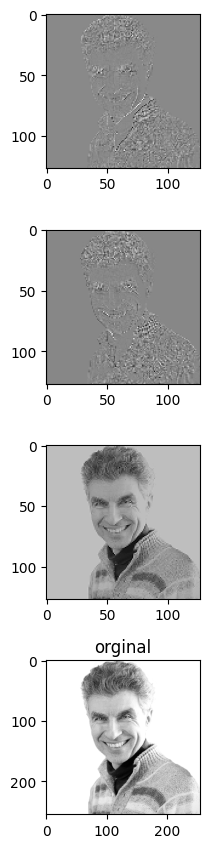

In [163]:
from matplotlib import colors
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(40, 10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
#plot 1:

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.title("orginal")
ax[3].imshow(img_gray, cmap='gray')

for i in range(0,3):
    norm_result = ((layer_two_output[:,:,i] - layer_two_output[:,:,i].min()) / (layer_two_output[:,:,i].max() - layer_two_output[:,:,i].min())) * 255
    ax[i].imshow(norm_result.astype(np.uint8), cmap='gray')

plt.show()


# ساخت فیلتر های لایه سوم و اعمال آن ها

در اینجا فیلتر های لایه سوم را تعریف کرده و به هم میچسبانیم

In [165]:

gaussian_5x5 = (1/273)*np.array([[1,4,7,4,1],
                        [4,16,26,16,4],
                        [7,26,41,26,7],
                        [4,16,26,16,4],
                        [1,4,7,4,1]])


averaging_5x5 = (1/25)*np.array(np.ones((5, 5)))
    
l3_filters = np.stack([gaussian_5x5, averaging_5x5], axis=-1)
print(l3_filters.shape)

(5, 5, 2)


کانوولوشن 2 بعدی را روی خروجی های لایه دوم با فیلتر های لایه سوم اعمال میکنیم

In [166]:
layer_three_output = Conv2D(layer_two_output, l3_filters, stride=1, padding='same')
print(layer_three_output.shape)

(127, 127, 2)


حال نتیجه را نمایش میدهیم که با توجه به این که در لایه سوم فقط 2 فیلتر داریم پس عمیق این تنسور 2 میشود که باید آن هارا همراه با شکل اصلی نمایش دهیم

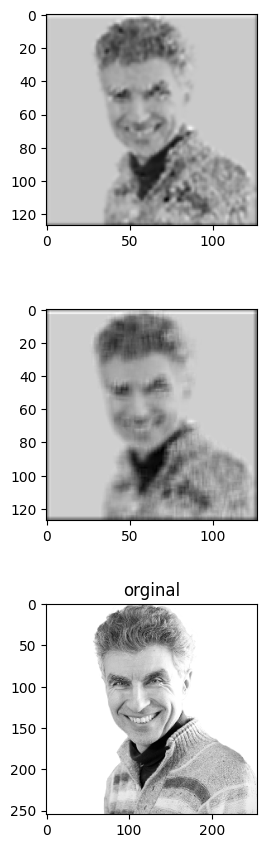

In [169]:
from matplotlib import colors
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
#plot 1:

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.title("orginal")
ax[2].imshow(img_gray, cmap='gray')

for i in range(0,2):
    norm_result = ((layer_three_output[:,:,i] - layer_three_output[:,:,i].min()) / (layer_three_output[:,:,i].max() - layer_three_output[:,:,i].min())) * 255
    ax[i].imshow(norm_result.astype(np.uint8), cmap='gray')

plt.show()


# نوشتن تابع پولینگ و اعمال آن

In [170]:
import numpy as np

def MaxPooling2D(img, window=(2, 2), stride=2):

    h, w, c = img.shape
    window_h, window_w = window
    stride_h, stride_w = stride, stride
    
    out_h = (h - window_h) // stride_h + 1
    out_w = (w - window_w) // stride_w + 1

    out = np.zeros((out_h, out_w, c))


    for i in range(out_h):
        for j in range(out_w):
            for d in range(c):
                patch = img[i*stride_h:i*stride_h+window_h, j*stride_w:j*stride_w+window_w,d]
                val = np.max(patch)
                out[i,j,d] = val
    return out

In [171]:
pooling_output = MaxPooling2D(layer_three_output, window=(2, 2), stride=2)
print(pooling_output.shape)

(63, 63, 2)


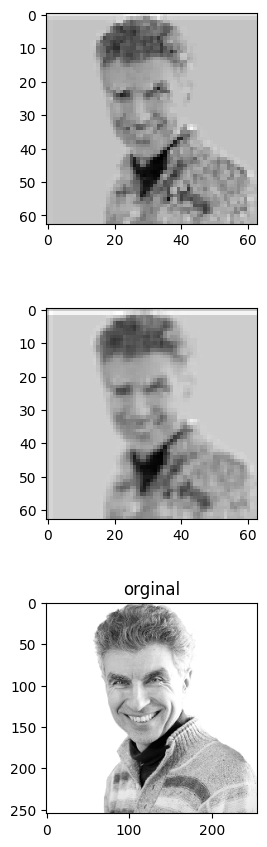

In [172]:
from matplotlib import colors
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
#plot 1:

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.title("orginal")
ax[2].imshow(img_gray, cmap='gray')

for i in range(0,2):
    norm_result = ((pooling_output[:,:,i] - pooling_output[:,:,i].min()) / (pooling_output[:,:,i].max() - pooling_output[:,:,i].min())) * 255
    ax[i].imshow(norm_result.astype(np.uint8), cmap='gray')

plt.show()
